和弦是我们在music21非和弦之外制作和弦的过程中创建的虚构词。选择功能强大的工具，将复杂的乐谱降低为多个部分，使一部分中的一连串和弦代表乐谱中正在发生的一切。请听巴赫的简短合唱

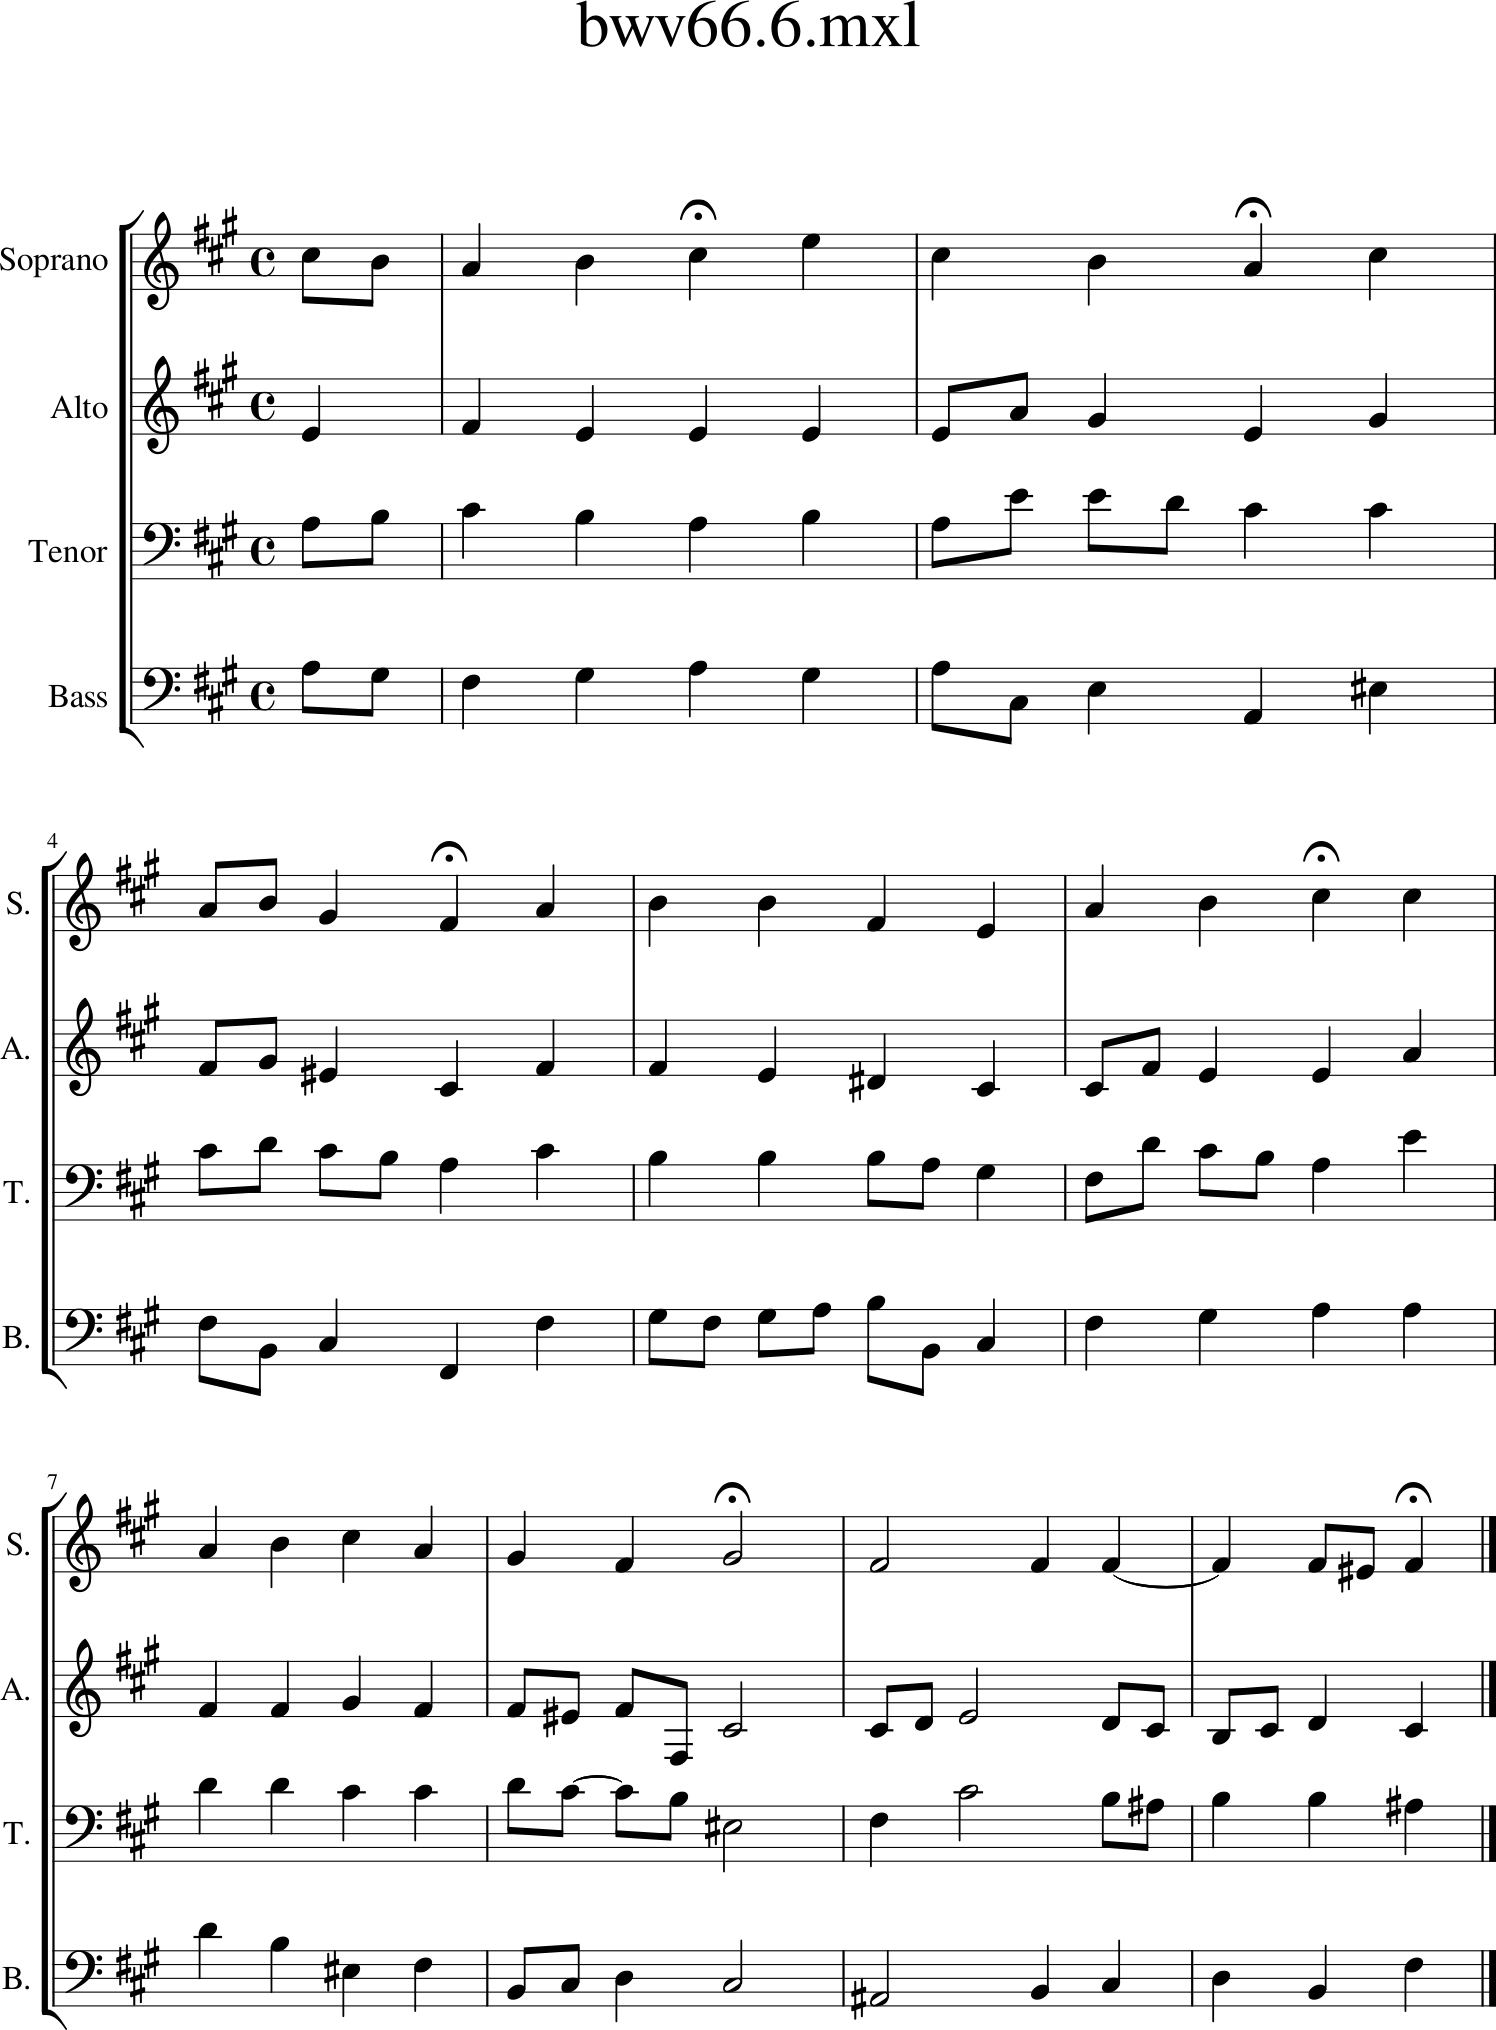

In [1]:
from music21 import *

b = corpus.parse('bwv66.6')
b.show()

让我们将其使用该chordify()方法整理 

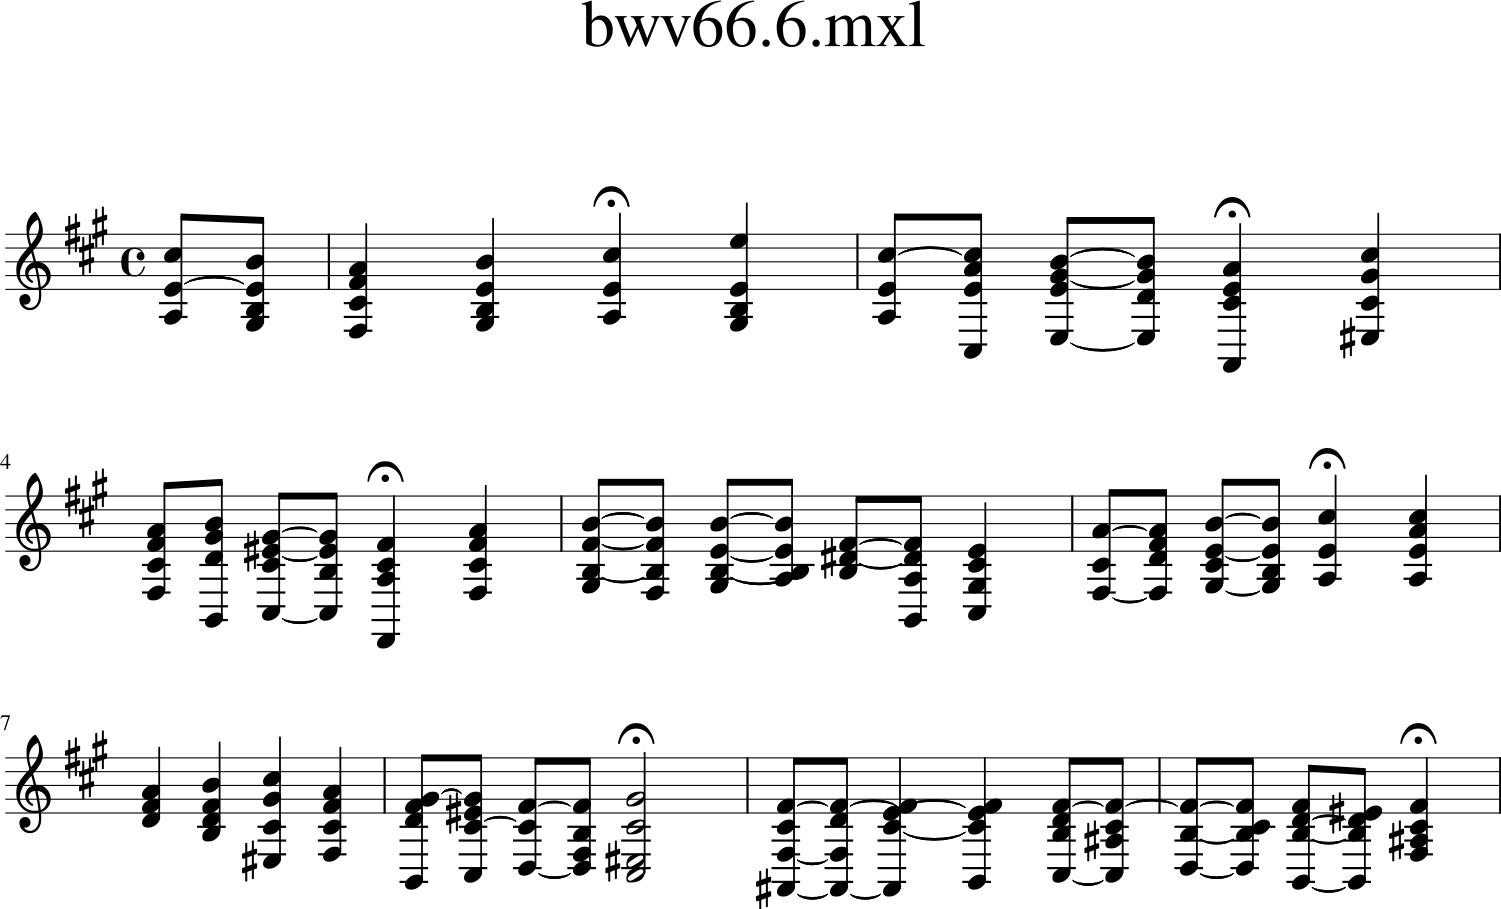

In [2]:
bChords = b.chordify()
bChords.show()

TA-DA！现在，乐谱中的每个音符都以单个和弦表示，并且某些元素移动的每时每刻也都被表示。有时，这种和弦过程称为“萨拉米切片”，也就是说，将分数切得很细，以至于每当发生某件事时，都可以得到充分体现。

现在，我们可以查看乐曲中是否有（全部注解）占主导地位的第七和弦。新的和弦部分仍然具有小节，因此我们将首先递归到和弦部分，以获取和弦。它还可能具有拍号等，因此我们将其过滤掉，因此只有和弦。

In [3]:
for thisChord in bChords.recurse().getElementsByClass('Chord'):
    if thisChord.isDominantSeventh():
        print(thisChord.measureNumber, thisChord.beatStr, thisChord)

2 2 1/2 <music21.chord.Chord E3 D4 G#4 B4>
3 2 1/2 <music21.chord.Chord C#3 B3 E#4 G#4>
4 3 1/2 <music21.chord.Chord B2 A3 D#4 F#4>
8 2 <music21.chord.Chord A#2 C#4 E4 F#4>


果然，我们可以检查上面的得分，并发现其中有四个：不合格的三个（m.2胜过2.5，m.3胜过2.5和m.4胜过3.5），它们是通过传递的运动制成的，和其中之一在米。8拍2也处于弱势位置。

我们可以通过在bChords 其自身上调用“ .show（）”来查看经过整理的版本，但是最好在整个乐谱中查看它。让我们将其放在分数的开头（所有Part对象都应该放在开头），然后仅显示小节0（拾取）到4：

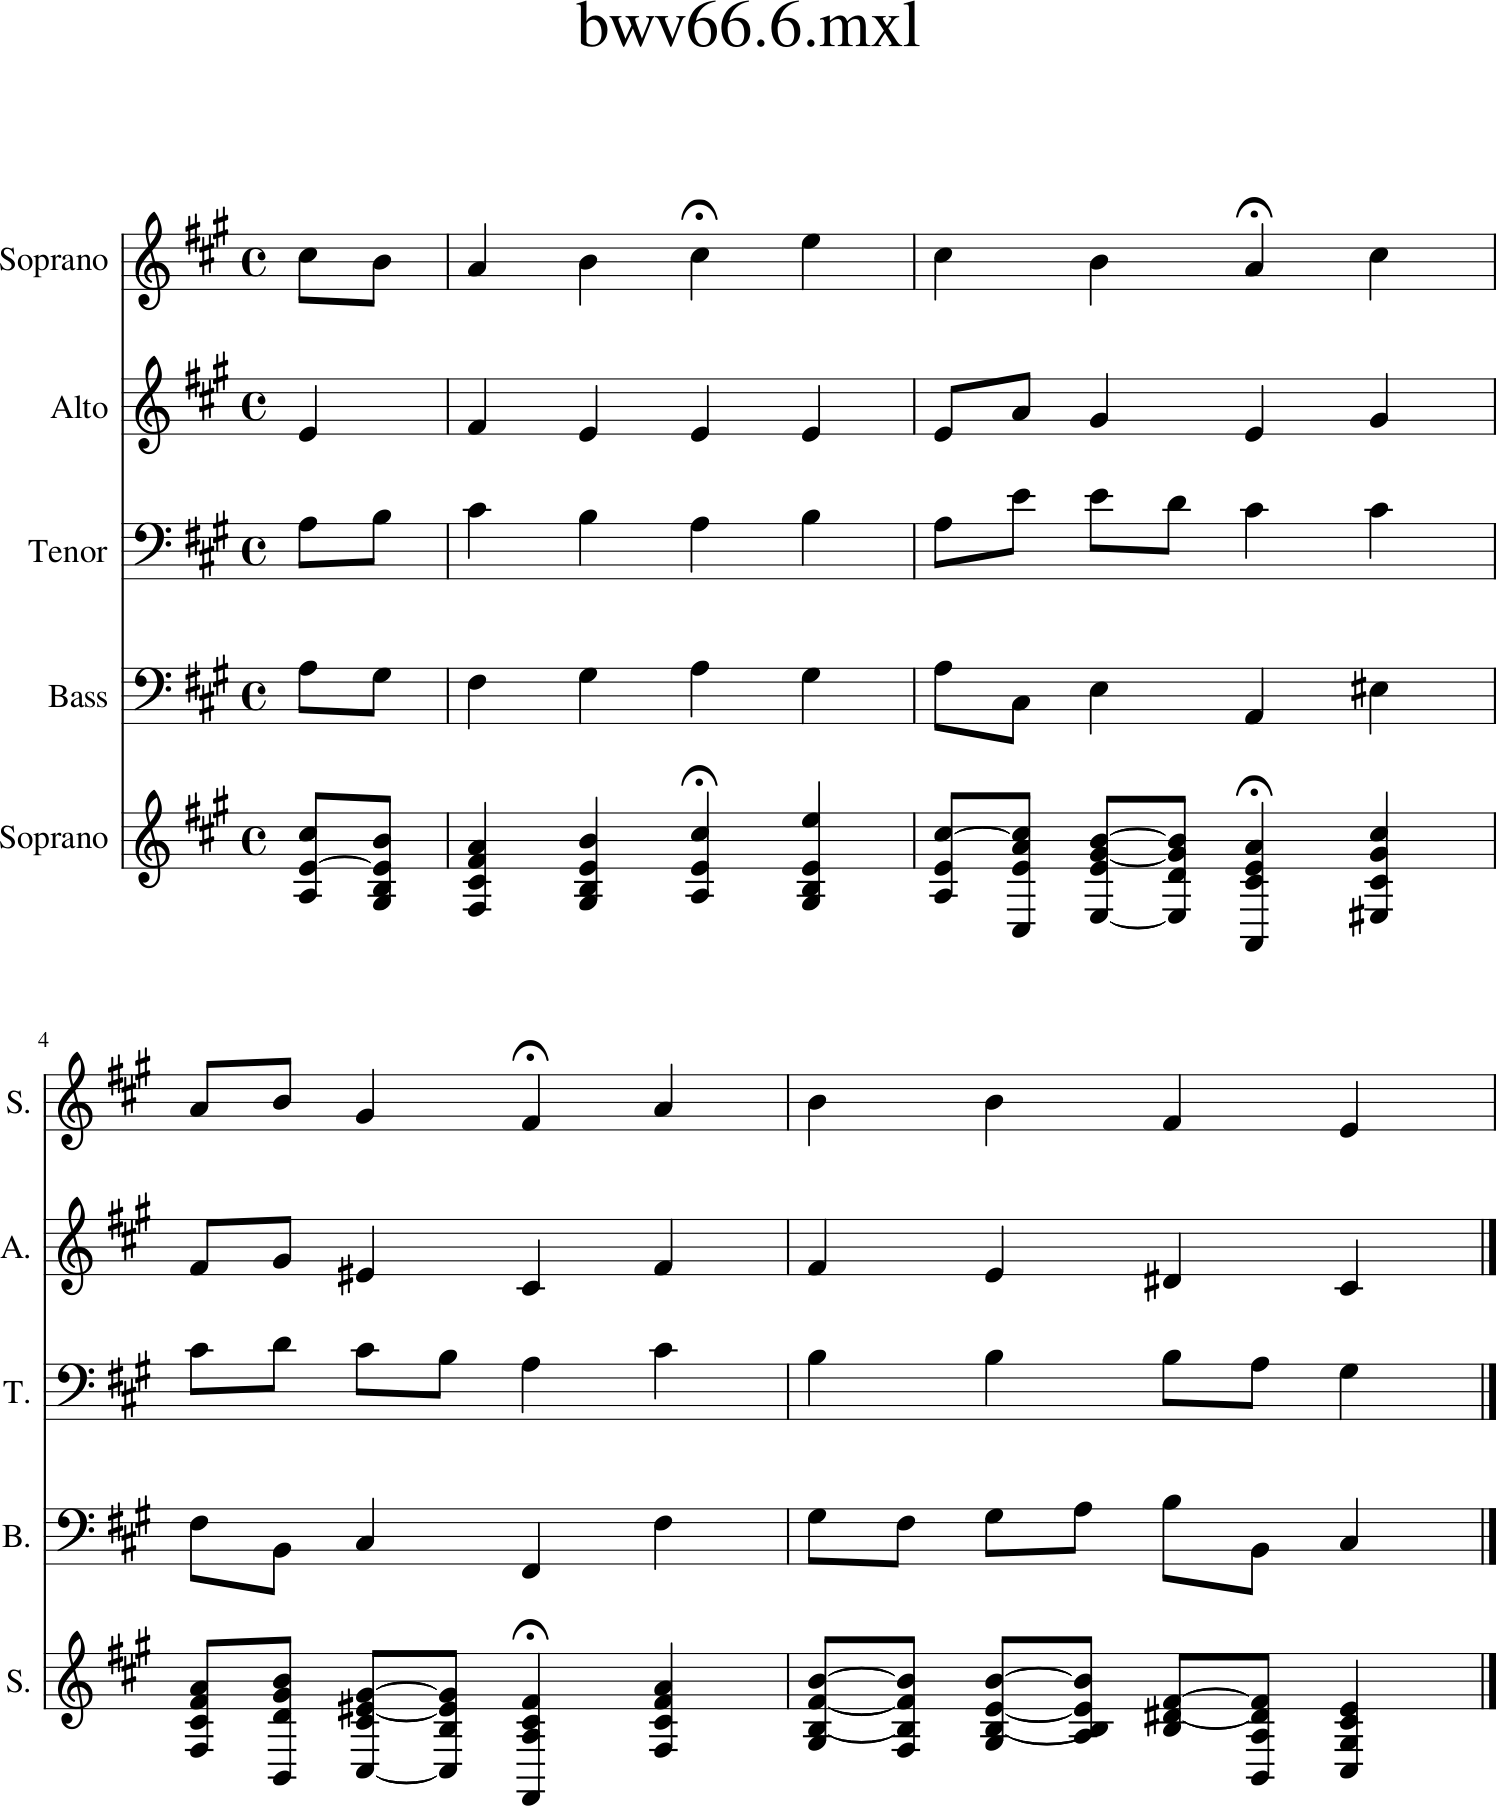

In [4]:
b.insert(0, bChords)
b.measures(0, 4).show()

读起来有点混乱，所以让所有这些和弦都放进去 closedPosition（有关更多信息，请参见《 用户指南》的第7章：和弦）。

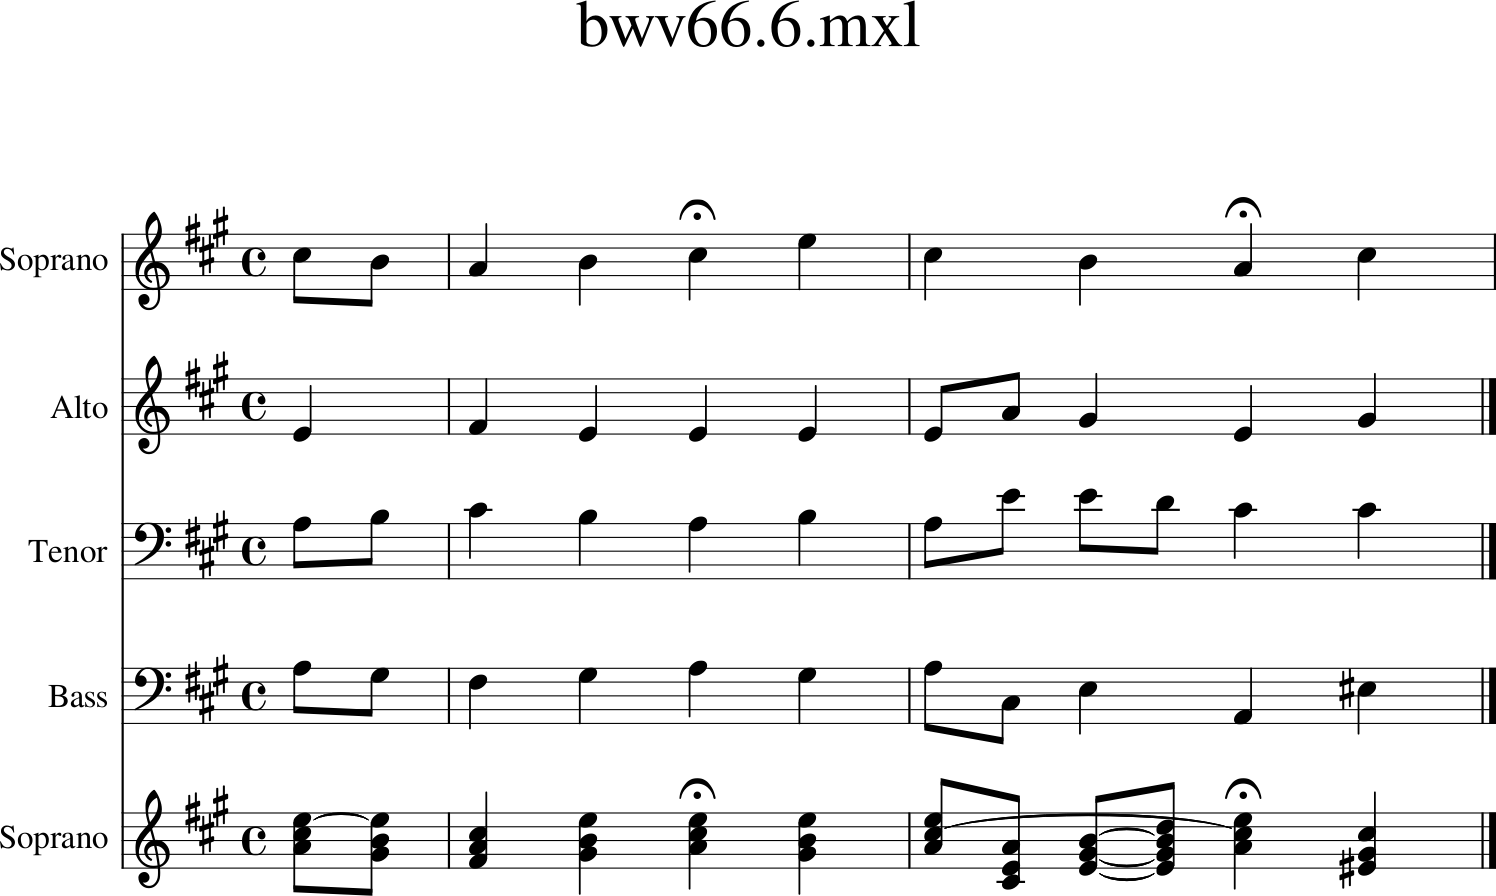

In [5]:
for c in bChords.recurse().getElementsByClass('Chord'):
    c.closedPosition(forceOctave=4, inPlace=True)

b.measures(0, 2).show()

请注意，当我们将和弦移至关闭位置时，不幸的是，它失去了tie信息，因为开始和弦的音高无法判断下一个音高是否会以不同的八度音程结束（例如，第一个Cs第二个完整小节的两个音符）。也许有一天我们可以做些...

我们可以使用该功能roman.romanNumeralFromChord标记每个和弦：


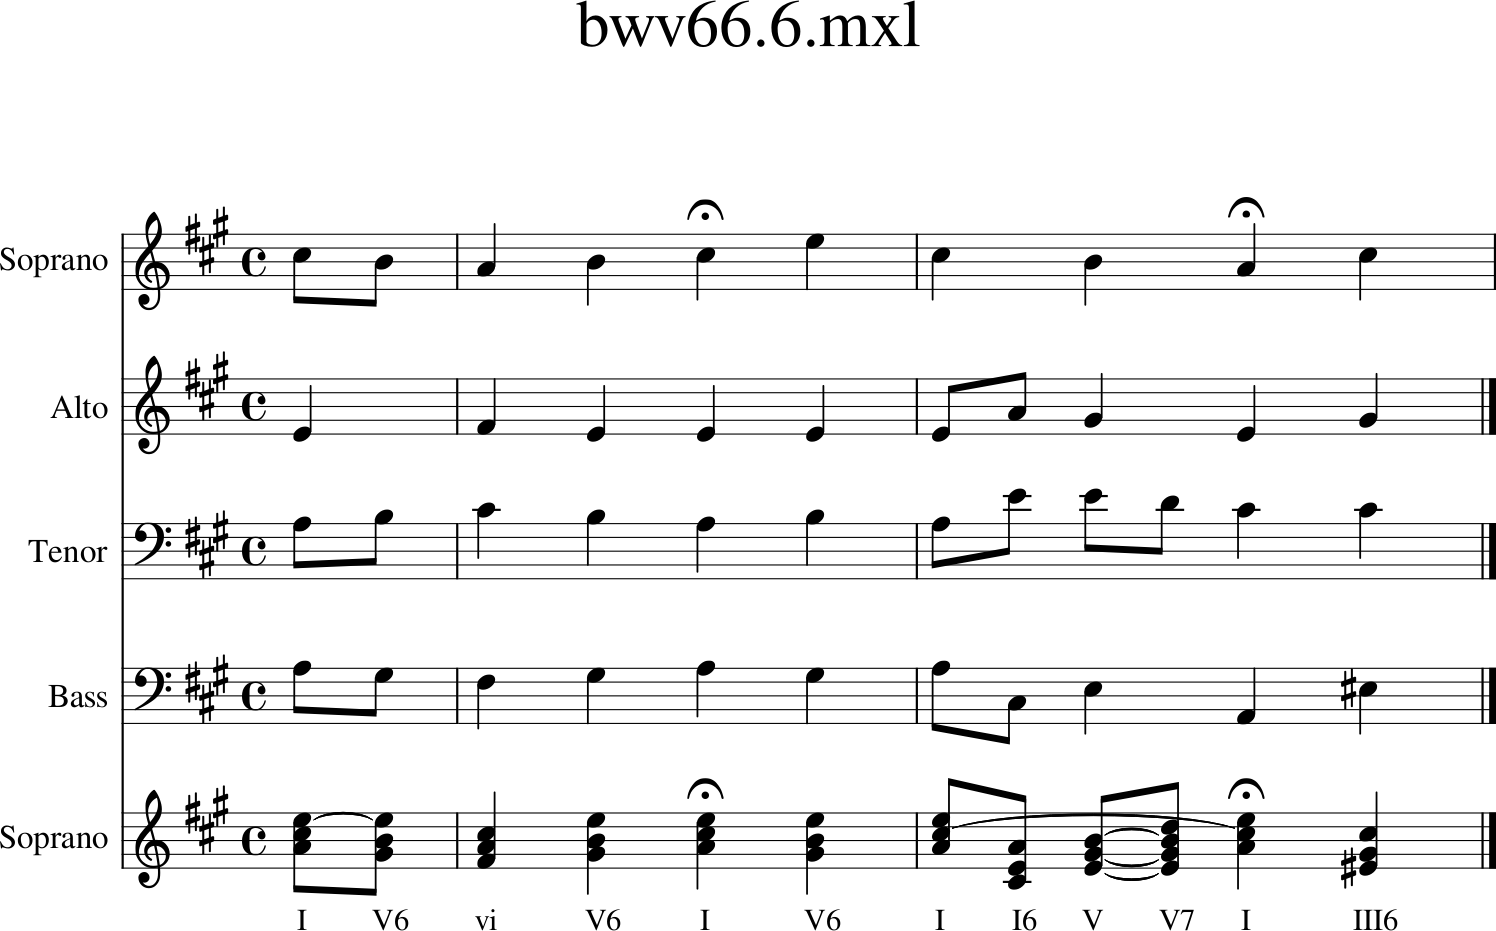

In [6]:
for c in bChords.recurse().getElementsByClass('Chord'):
    rn = roman.romanNumeralFromChord(c, key.Key('A'))
    c.addLyric(str(rn.figure))

b.measures(0, 2).show()

如果我们查看.show('text') 输出，也可以直接看到所有内容

In [7]:
bChords.measures(0, 2).show('text')

{0.0} <music21.instrument.Instrument 'P1: Soprano: Instrument 1'>
{0.0} <music21.stream.Measure 0 offset=0.0>
    {0.0} <music21.clef.TrebleClef>
    {0.0} <music21.key.Key of f# minor>
    {0.0} <music21.meter.TimeSignature 4/4>
    {0.0} <music21.chord.Chord A4 C#5 E5>
    {0.5} <music21.chord.Chord G#4 B4 E5>
{1.0} <music21.stream.Measure 1 offset=1.0>
    {0.0} <music21.chord.Chord F#4 A4 C#5>
    {1.0} <music21.chord.Chord G#4 B4 E5>
    {2.0} <music21.chord.Chord A4 C#5 E5>
    {3.0} <music21.chord.Chord G#4 B4 E5>
{5.0} <music21.stream.Measure 2 offset=5.0>
    {0.0} <music21.chord.Chord A4 C#5 E5>
    {0.5} <music21.chord.Chord C#4 E4 A4>
    {1.0} <music21.chord.Chord E4 G#4 B4>
    {1.5} <music21.chord.Chord E4 G#4 B4 D5>
    {2.0} <music21.chord.Chord A4 C#5 E5>
    {3.0} <music21.chord.Chord E#4 G#4 C#5>


我们还可以提取歌词，在其中存储RomanNumeral信息：

In [8]:
for c in bChords.measures(0,2).flat:
    if 'Chord' not in c.classes:
        continue
    print(c.lyric, end=' ')

I V6 vi V6 I V6 I I6 V V7 I III6 

### 使用Chordify注释间隔
快速降低分数的一种好方法是使用 和弦上chordify的annotateIntervals方法。我们可以使用上一章中描述的多部分ABC文件之一进行演示。

让我们载入有史以来最美丽的纪念作品之一，约瑟金·德·普雷斯（Josquin des Prez）卒于约翰内斯·奥格海姆（Johannes Ockeghem）逝世的主题（卒于1521年）：

In [9]:
o = corpus.parse('josquin/laDeplorationDeLaMorteDeJohannesOckeghem')
for s in o:
    print(s)

<music21.stream.Score 0x213c4686320>
<music21.stream.Score 0x213c56ac588>
<music21.stream.Score 0x213c56cd048>
<music21.stream.Score 0x213c5688048>
<music21.stream.Score 0x213c4410d30>


好的，所以我们有一个分数集合可以合并成一部分–这是一种不常见但并非完全罕见的现象，因此我们将它们合并：

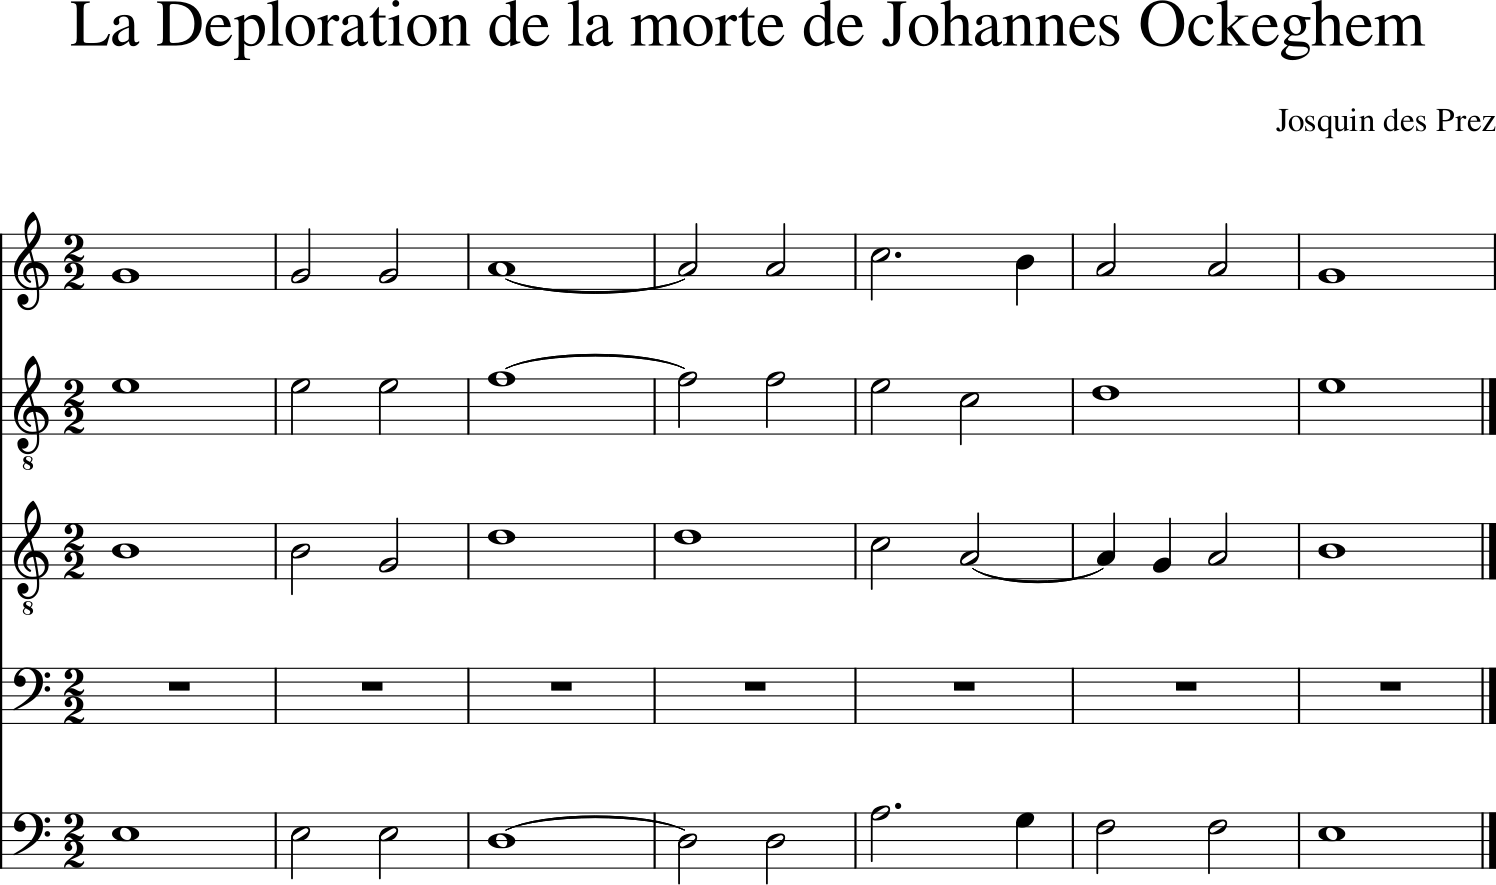

In [10]:
mergedScores = o.mergeScores()
scoreExcerpt = mergedScores.measures(127, 133)
scoreExcerpt.show()

让我们整理一下：

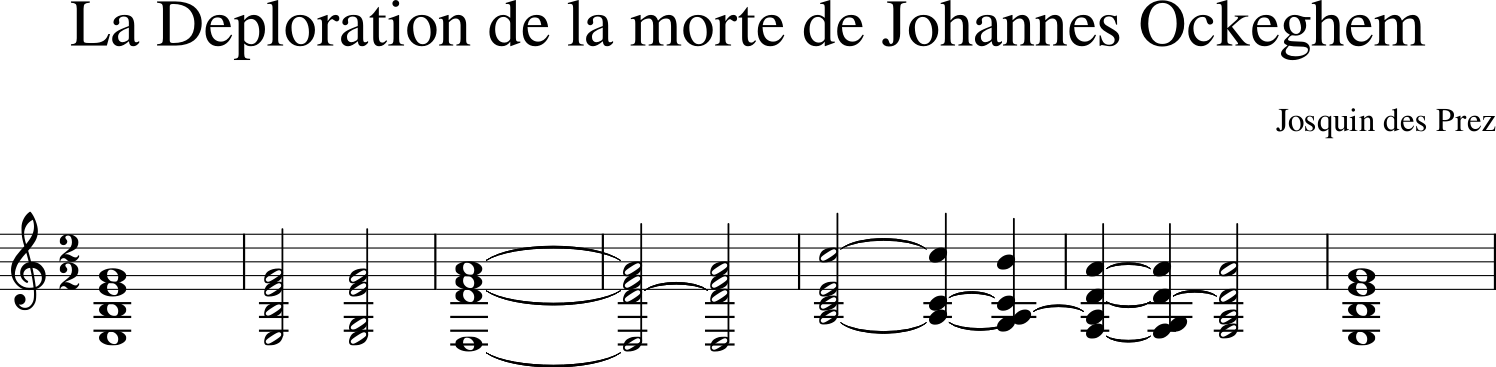

In [11]:
reduction = scoreExcerpt.chordify()
reduction.show()

我们将遍历和弦并将其置于八度音阶4的闭合位置，然后运行以下annotateIntervals命令：

In [12]:
for c in reduction.recurse().getElementsByClass('Chord'):
    c.closedPosition(forceOctave=4, inPlace=True)
    c.annotateIntervals()

我们将减少的部分放回分数中并显示出来。我们insert 在分数的零点上使用append它，而不是使用它，因为它与其他部分在同一时间点开始。让我们也摆脱掉第四部分，因为它是空白的。

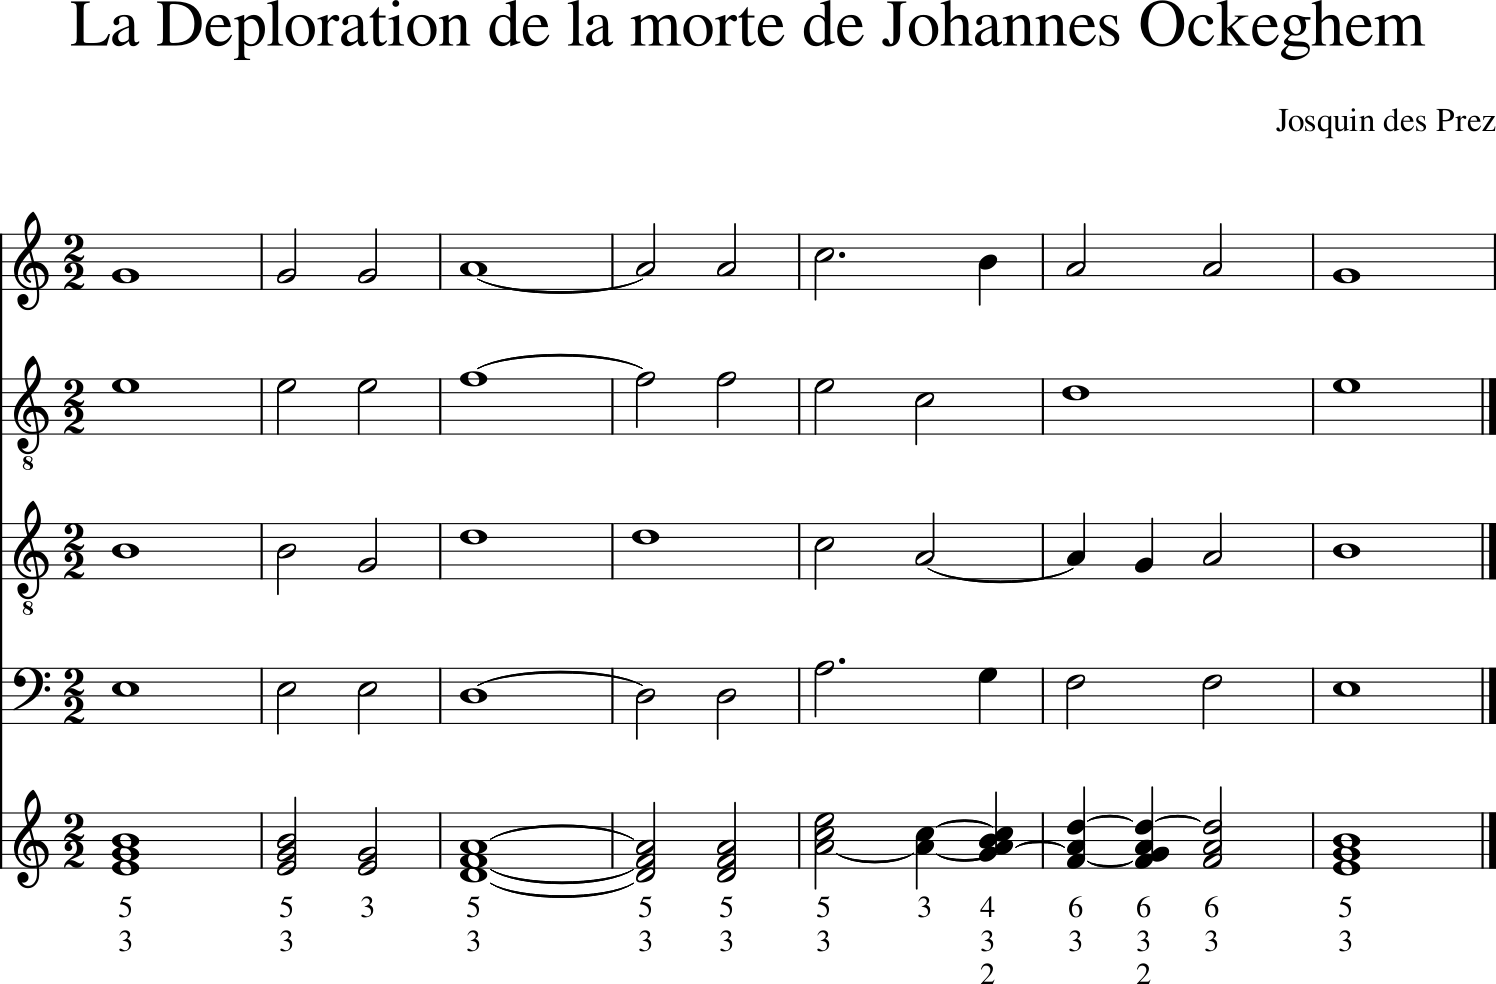

In [13]:
scoreExcerpt.insert(0, reduction)
emptyPart = scoreExcerpt.parts[3]
scoreExcerpt.remove(emptyPart)
scoreExcerpt.show()

间隔已添加为和弦上的歌词：

In [14]:
for c in reduction.recurse().getElementsByClass('Chord'):
    print(c, end=" ")
    for l in c.lyrics:
        print(l.text, end=" ")
    print()

<music21.chord.Chord E4 G4 B4> 5 3 
<music21.chord.Chord E4 G4 B4> 5 3 
<music21.chord.Chord E4 G4> 3 
<music21.chord.Chord D4 F4 A4> 5 3 
<music21.chord.Chord D4 F4 A4> 5 3 
<music21.chord.Chord D4 F4 A4> 5 3 
<music21.chord.Chord A4 C5 E5> 5 3 
<music21.chord.Chord A4 C5> 3 
<music21.chord.Chord G4 A4 B4 C5> 4 3 2 
<music21.chord.Chord F4 A4 D5> 6 3 
<music21.chord.Chord F4 G4 A4 D5> 6 3 2 
<music21.chord.Chord F4 A4 D5> 6 3 
<music21.chord.Chord E4 G4 B4> 5 3 


从这里可以轻松找到有趣的地方，例如摘录第五小节末尾的“ 4321”和弦，在文艺复兴时期的复音中，即使是经过传递的音色集合，我也无法发现的东西！

### 整理和提高分数
也可以对更复杂的分数进行分类。如果有很多连音，您可能会得到奇怪的结果。例如Opus 19，没有。6，由Arnold Schoenberg撰写

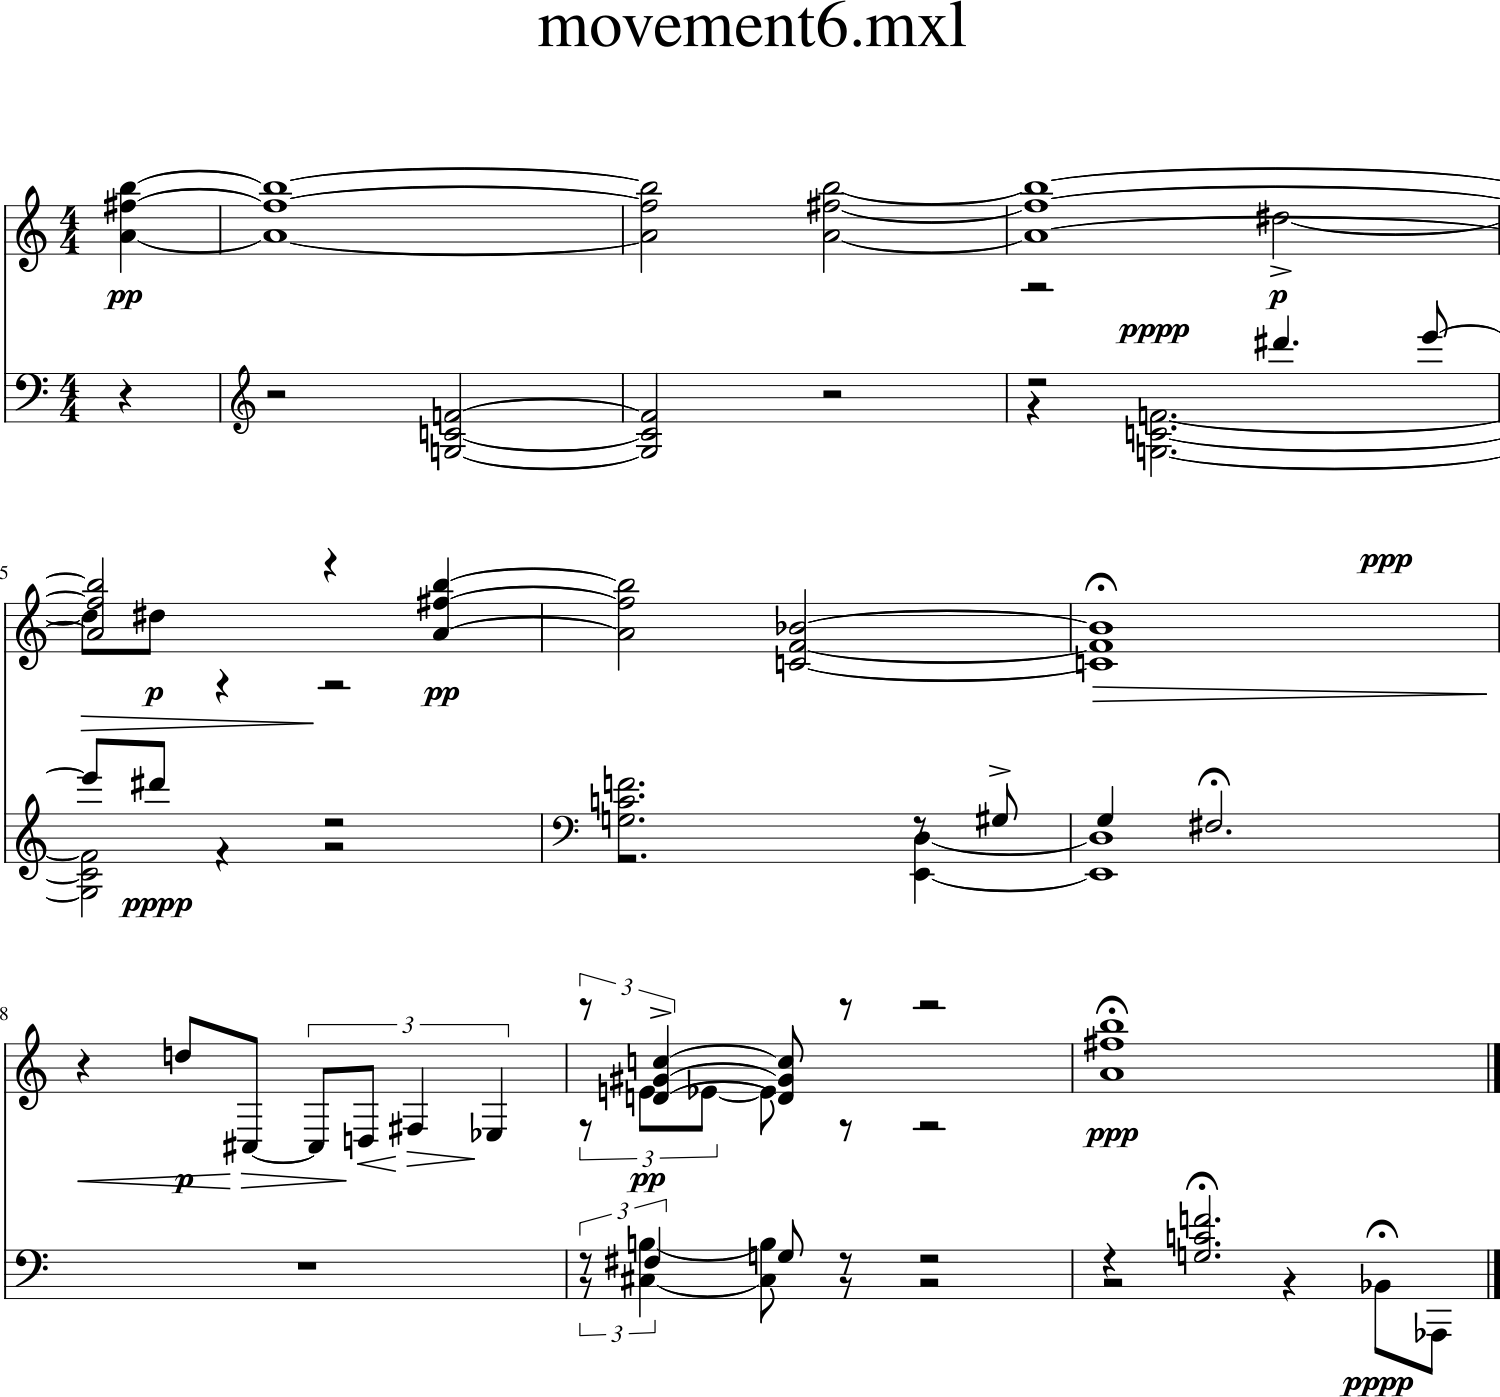

In [15]:
schoenberg = corpus.parse('schoenberg/opus19', 6)
schoenberg.show()

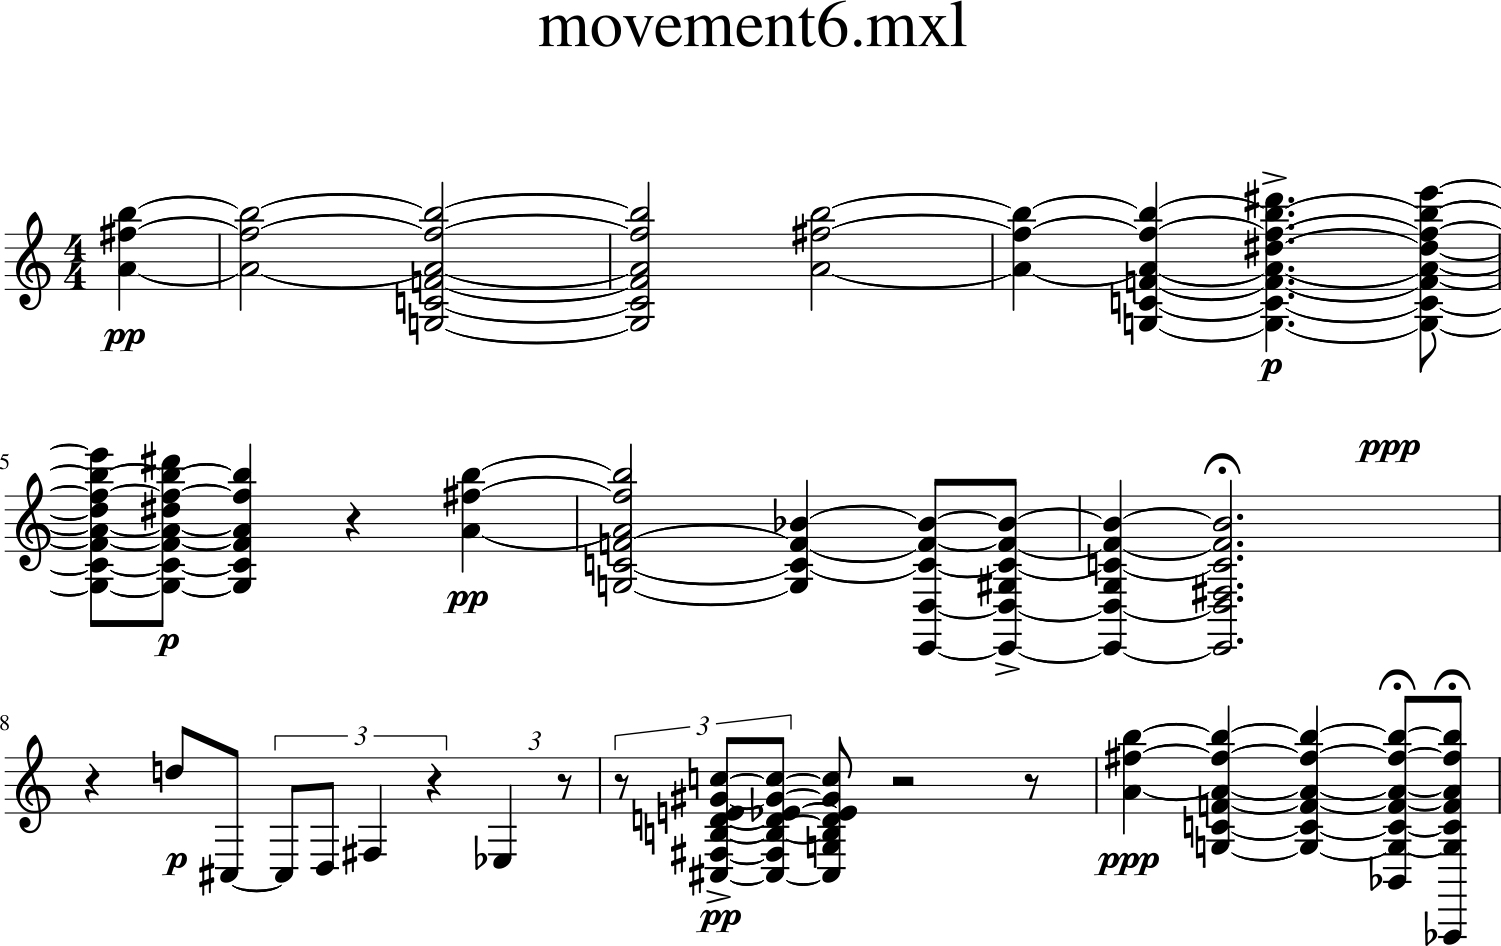

In [16]:
chorded = schoenberg.chordify()
chorded.show()

有更多针对的专用命令.chordify，因此，如果您想了解更多信息，请查看chordify() 文档。addPartIdAsGroup稍后，我们将介绍该选项，该选项将让您确切了解和弦的每个音高来自何处。现在，让我们跳到第一个示例， 第10章：示例1